In [2]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram

In [3]:
svbackend = BasicAer.get_backend('statevector_simulator')
qmbackend = BasicAer.get_backend('qasm_simulator')

# Phase Estimation

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
from fractions import Fraction
np.set_printoptions(precision=3, suppress=True)

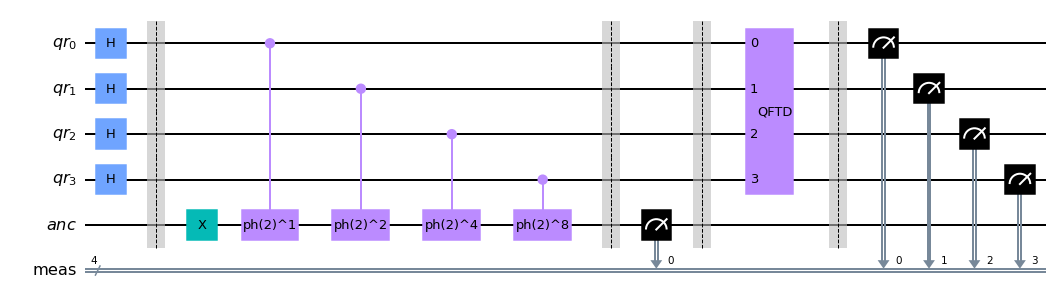

In [249]:
t = 2.4
nqr = 4
nanc = 1
Q = 2**nqr

qr = QuantumRegister(nqr, 'qr')
anc = QuantumRegister(nanc, 'anc')
meas = ClassicalRegister(nqr, 'meas')
qpe = QuantumCircuit(qr, anc, meas)
qpe.h(qr)
qpe.barrier()

##################################################################################################################

qpe.x(anc[nanc-1])
def ph(t, exp):
    qc = QuantumCircuit(1)
    for i in range(exp):
        qc.p((2*math.pi)/t, 0)
    return qc

def c_ph(t, exp):
    qc = ph(t,exp).to_gate()
    qc.name = "ph(%i)^%i" % (t, exp)
    c_qc = qc.control()
    return c_qc

for nq in range(nqr):
    qpe.append(c_ph(t, 2**nq), [qr[nq]]+[qanc for qanc in anc])

##################################################################################################################

qpe.barrier()
qpe.measure(anc,meas[:nanc])
qpe.barrier()

##################################################################################################################

def qdft(n):
    qc = QuantumCircuit(n)
    for q in range(n//2):
        qc.swap(q, n-q-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    return qc

def qdftd(n):
    qc = qdft(n).inverse().to_gate()
    qc.name = "QFTD" 
    return qc

qpe.append(qdftd(nqr), qr)

##################################################################################################################

qpe.barrier()
qpe.measure(qr,meas)
qpe.draw(output='mpl', fold=-1)

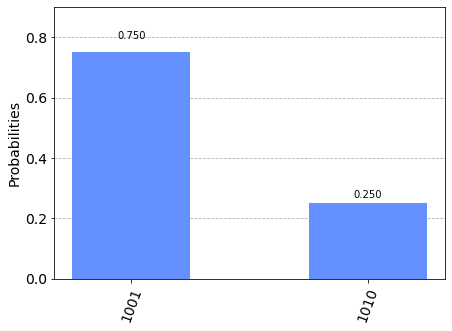

In [250]:
job = execute(qpe, qmbackend, shots=Q)
result = job.result()
result.get_counts()
plot_histogram(result.get_counts())

In [258]:
print("Possible peak deltas [Cheating]:")
i = 0
deltas = []
while (Q/t)*i < Q:
    deltas.append((Q/thet)*i)
    i+=1
print(deltas)

print("\nExpected peak delta [Cheating]:")
print((Q/t)*(t-1))

print("\nObserved peak delta")
values = [int(output,2) for output in result.get_counts()]
print(values)

print("\nPunctured deltas")
values = [int(output,2)/Q for output in result.get_counts()]
print(values)

print("\nMinused deltas")
values = [1-int(output,2)/Q for output in result.get_counts()]
print(values)

print("\nError percentages")
percent = [abs(x-1/t)*100 for x in values]
print(percent)

print("\nResult:")
if percent[0] < 5:
    print("Success") 
else:
    print("Failure")
print(values[0])     
print(values[0]*2*math.pi) 

Possible peak deltas [Cheating]:
[0.0, 5.0, 10.0, 15.0]

Expected peak delta [Cheating]:
11.0

Observed peak delta
[11, 5]

Punctured deltas
[0.6875, 0.3125]

Minused deltas
[0.3125, 0.6875]

Error percentages
[0.0, 37.5]

Result:
Success
0.3125
1.9634954084936207
